In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

import seaborn as sns
sns.set_theme()

In [2]:
wine = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\wine.csv')

sub_wine = wine.loc[wine['type']!=3, ['type', 'Alcohol', 'Color intensity']]

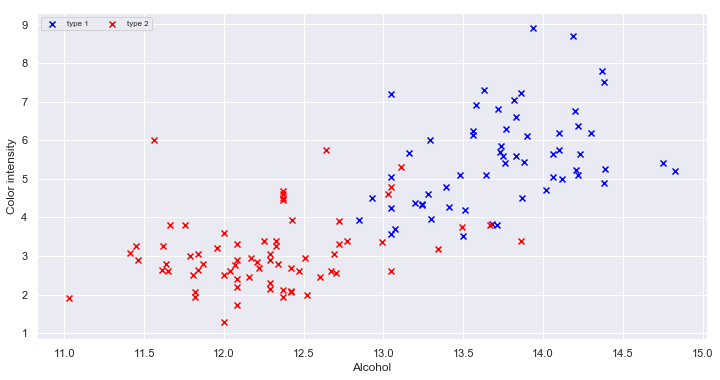

In [3]:
# By illustrating the data, we will find again that the two type of wine data is not linearly separable.

plt.figure(figsize=(12,6))
t1 = plt.scatter(sub_wine.loc[sub_wine['type']==1, 'Alcohol'], sub_wine.loc[sub_wine['type']==1, 'Color intensity'], marker = 'x', c='blue')
t2 = plt.scatter(sub_wine.loc[sub_wine['type']==2, 'Alcohol'], sub_wine.loc[sub_wine['type']==2, 'Color intensity'], marker = 'x', c='red')
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.legend((t1, t2),
           ('type 1', 'type 2'),
           scatterpoints = 1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()

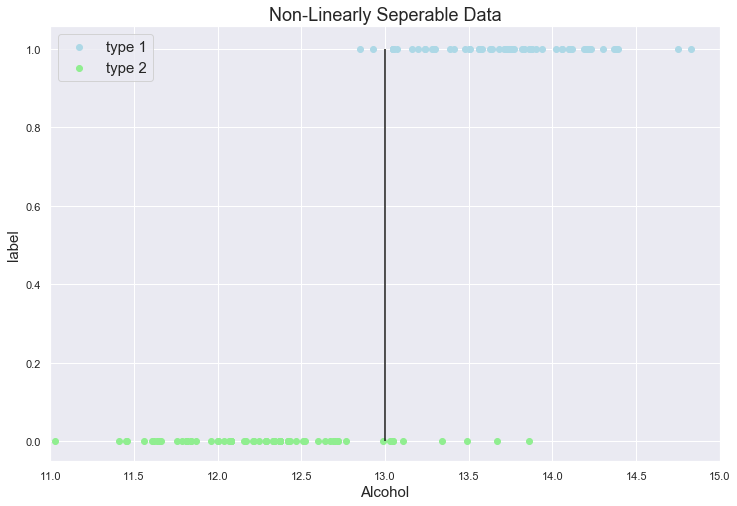

In [4]:
plt.figure(figsize = (12, 8))
plt.xlim((11.0, 15.0))
plt.scatter(sub_wine.loc[sub_wine['type']==1, 'Alcohol'], 
            np.ones(len(sub_wine.loc[sub_wine['type']==1, 'Alcohol'])), 
            color = "lightblue", 
            label = "type 1")
plt.scatter(sub_wine.loc[sub_wine['type']==2, 'Alcohol'], 
            np.zeros(len(sub_wine.loc[sub_wine['type']==2, 'Alcohol'])), 
            color = "lightgreen", 
            label = "type 2")
plt.vlines(13, 0.0, 1.0)
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

In [5]:
# The above plot shows that overlapping exist to some degree, so we can use a sigmoid activation function to product probablity output.
# Also, here we use a binary cross entropy loss function to calculate the loss.

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

class SingleNeuron(object):
    
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()




In [6]:
model0 = SingleNeuron(sigmoid, cross_entropy_loss)

X = sub_wine['Alcohol'].values
X = X.reshape(-1, 1)
y = np.where(sub_wine['type'] == 2, 0, 1)

model0.train(X, y, alpha = 0.001, epochs = 50000)

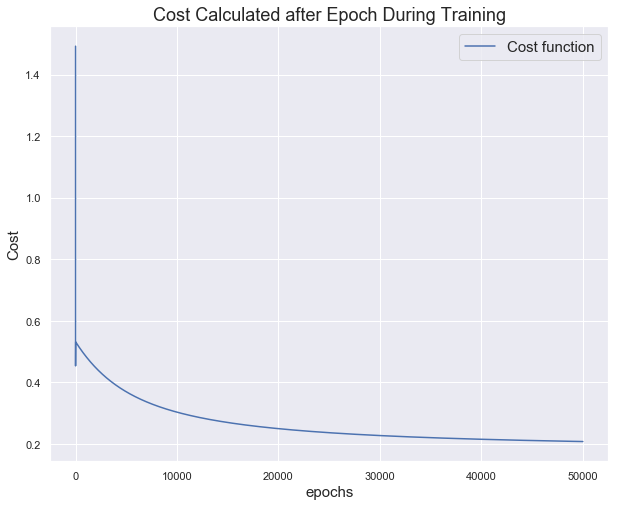

In [7]:
model0.plot_cost_function()
plt.show()

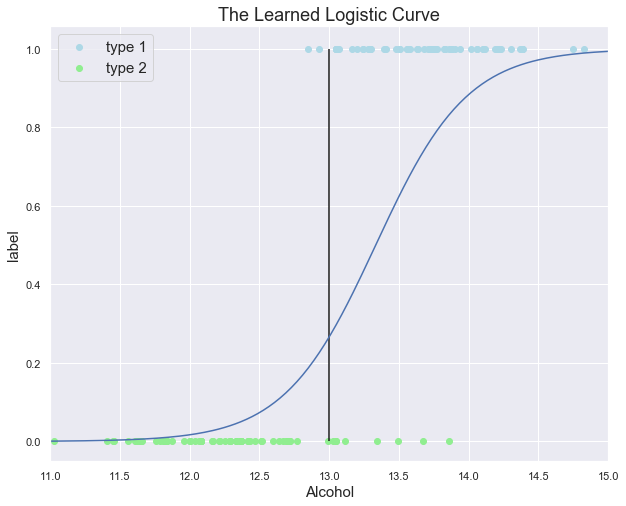

In [8]:
plt.figure(figsize = (10, 8))
plt.xlim((11.0, 15.0))
plt.scatter(sub_wine.loc[sub_wine['type']==1, 'Alcohol'], 
            np.ones(len(sub_wine.loc[sub_wine['type']==1, 'Alcohol'])), 
            color = "lightblue", 
            label = "type 1")
plt.scatter(sub_wine.loc[sub_wine['type']==2, 'Alcohol'], 
            np.zeros(len(sub_wine.loc[sub_wine['type']==2, 'Alcohol'])), 
            color = "lightgreen", 
            label = "type 2")
domain = np.linspace(11.0, 15.0, 200)
plt.plot(domain, model0.predict(domain.reshape(-1, 1)))
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.vlines(13, 0.0, 1.0)
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.show()

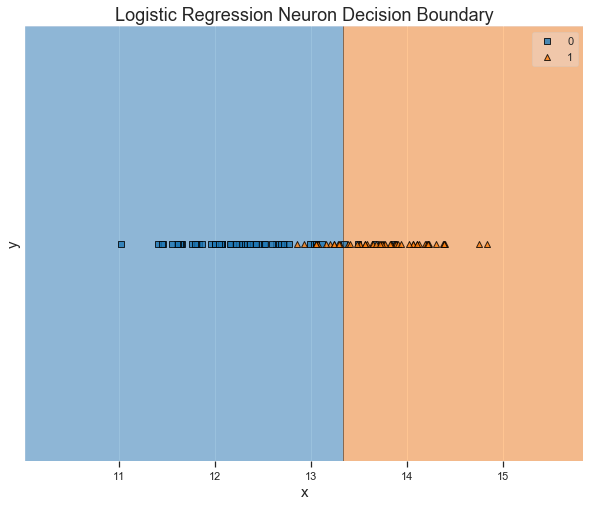

In [9]:
model0.plot_decision_boundary(X, y)
plt.show()

# So for wine datasets, after picking a suitable learning rate and training epochs, it is possible to find a roughly feasible decision boundary on such a non-linearly separable datasets.